In [20]:
# 결정 트리 알고리즘
    # 목표: 숫자 데이터를 바탕으로 class가 0/1 구분하도록 학습시키기
# 1. 데이터 불러오기
import pandas as pd
# csv는 쉼표로 구분돼 있는 게 일반적인데, ; 등으로 구분돼 있는 경우 있음 -> 이 경우 구분자 설정 변경해야 함
red_wine = pd.read_csv('data/winequality-red.csv', sep=';') # 구분자 세미 콜론으로 돼 있단 것 -> 보통 텍스트 중간에 쉼표 있는 경우 ;로 연결돼 있음
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

# 데이터 필터링: 알콜, 당도, pH
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine['class'] = 0 # class 새 컬럼 만들어 0으로 채움
red_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True) # 컬럼명 변경, 원본 수정
    # rename(): 컬럼명 변경 시 dict으로 해야 함ㄴ
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine['class'] = 1 # class 새 컬럼 만들어 0으로 채움
white_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)

wine = pd.concat([red_wine, white_wine]) # 2개 df 위아래로 합병

# 2. 로지스틱 회귀: 이진 분류
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

# 데이터 셋 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 학습시키기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 근데 비선형적인 데이터므로 로지스틱 회귀 함수 적용하는 건 적절하지 않음 -> 정확도 낮음

0.7797619047619048
0.7833846153846153


C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50) # 하이퍼 파라미터 조정 가능
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 로지스틱 대비 성능 많이 올라감: 선으로 그릴 수 없는 데이터에 유용, 스무고개로 수많이 반복하는
# 선형 회귀와 달리 정규화X도 됨

0.9969211822660099
0.8756923076923077


In [36]:
train_scaled

array([[-0.92752825,  1.21113368,  0.87517138],
       [-0.33998253, -0.84132286,  1.3097055 ],
       [ 1.50658973, -0.65088875,  0.31648466],
       ...,
       [-0.59178784, -0.92596024,  0.19233206],
       [-1.01146336, -0.54509202,  0.25440836],
       [-1.01146336, -0.73552613,  0.31648466]], shape=(4872, 3))

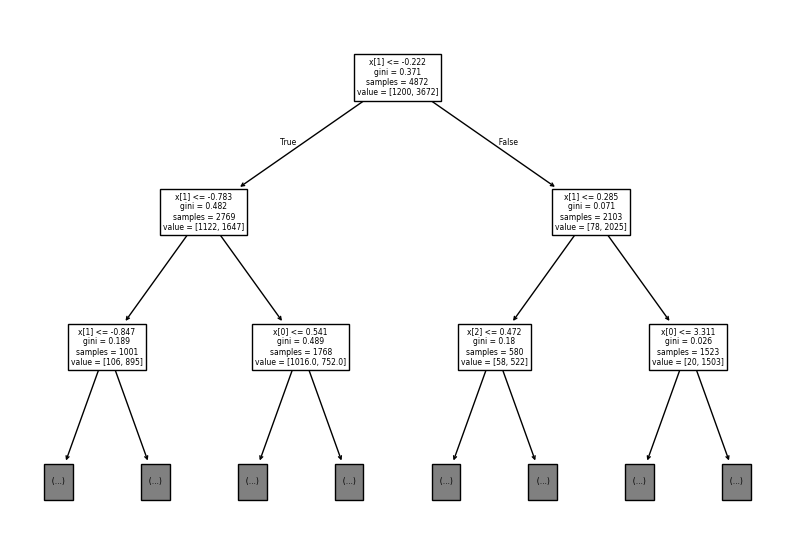

In [34]:
# 어떤 구조로 판단한 건지 결정 트리 시각화하기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2) # max_depth=1: 최상단의 트리만 보겠단 것
plt.show()
# 질문1: 알콜, 슈가, pH 중 1번째 데이터(슈가)가 -0.222 이상인지 판별
    # -> 이런 식으로 계속 분류